In [2]:

# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings

warnings.filterwarnings('ignore')

In [3]:
merged = pd.read_csv('signals.csv')
meta = pd.read_csv('metadata.csv')
merged['activity'] = meta['activity']
merged = merged.dropna()
y = merged['activity']
merged.head(5)


,user_snippet,x-axis,y-axis,z-axis,timestamp,activity
0,1008_0,-5.01,10.99,4.75,0.0,Upstairs
1,1008_0,-2.72,13.25,4.44,50.0,Upstairs
2,1008_0,5.41,13.18,1.27,100.0,Walking
3,1008_0,-1.80,0.15,-2.72,150.0,Jogging
4,1008_0,-2.91,-3.87,-2.49,200.0,Jogging


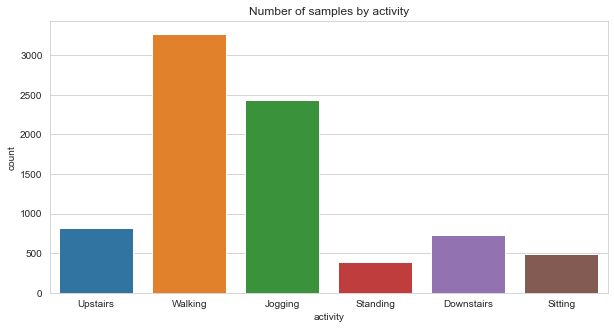

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = merged)
plt.title('Number of samples by activity')
plt.savefig('samplesBYactivity.png', dpi=300, bbox_inches='tight')
plt.show()


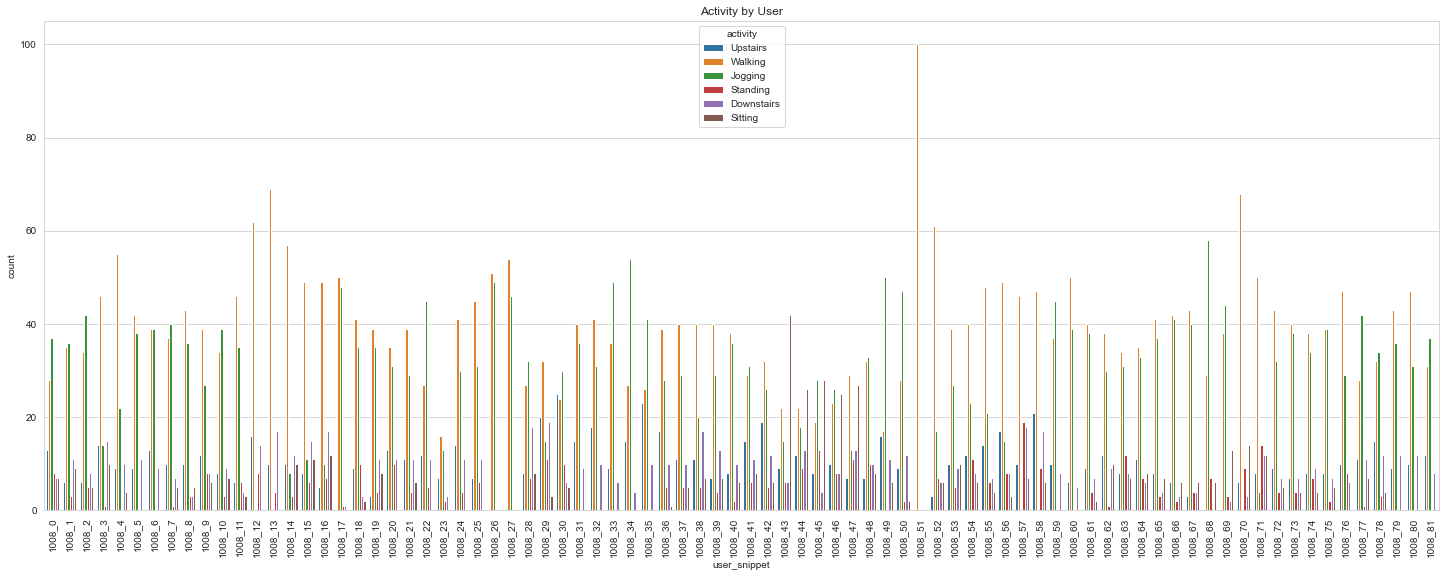

In [9]:
plt.figure(figsize = (25, 9))
sns.countplot(x = 'user_snippet', hue = 'activity', data = merged)
plt.title('Activity by User')
plt.xticks(rotation = 90) # Rotate x-axis labels by 90 degrees
plt.savefig('ActByUser.png')

plt.show()

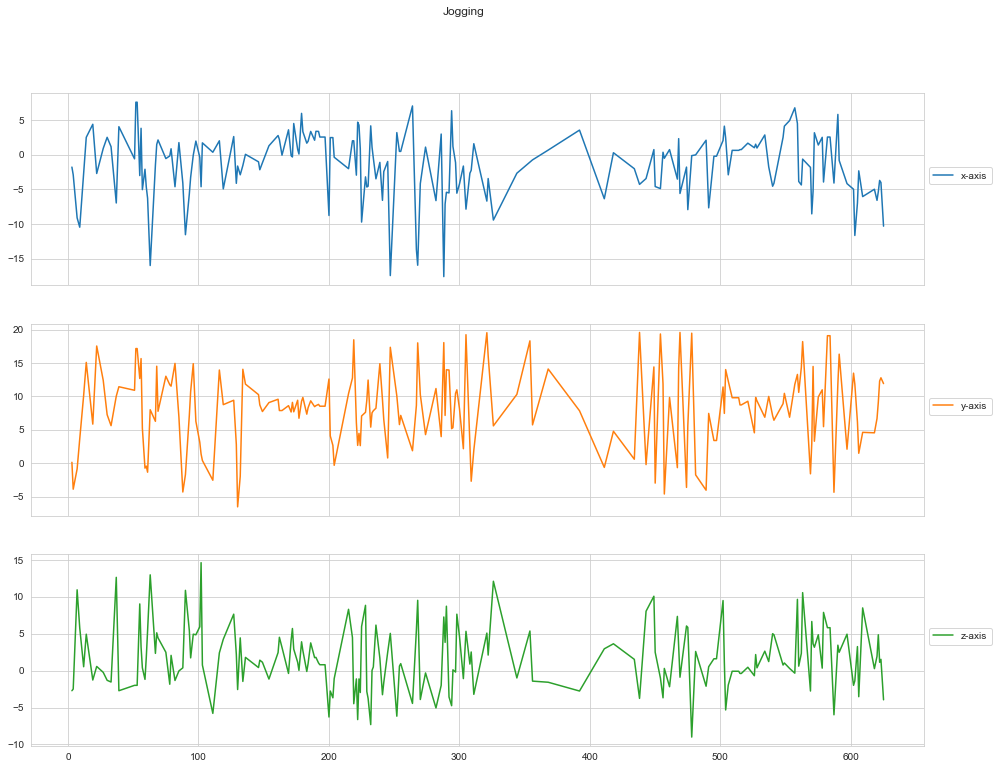

In [6]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity("Jogging", merged)

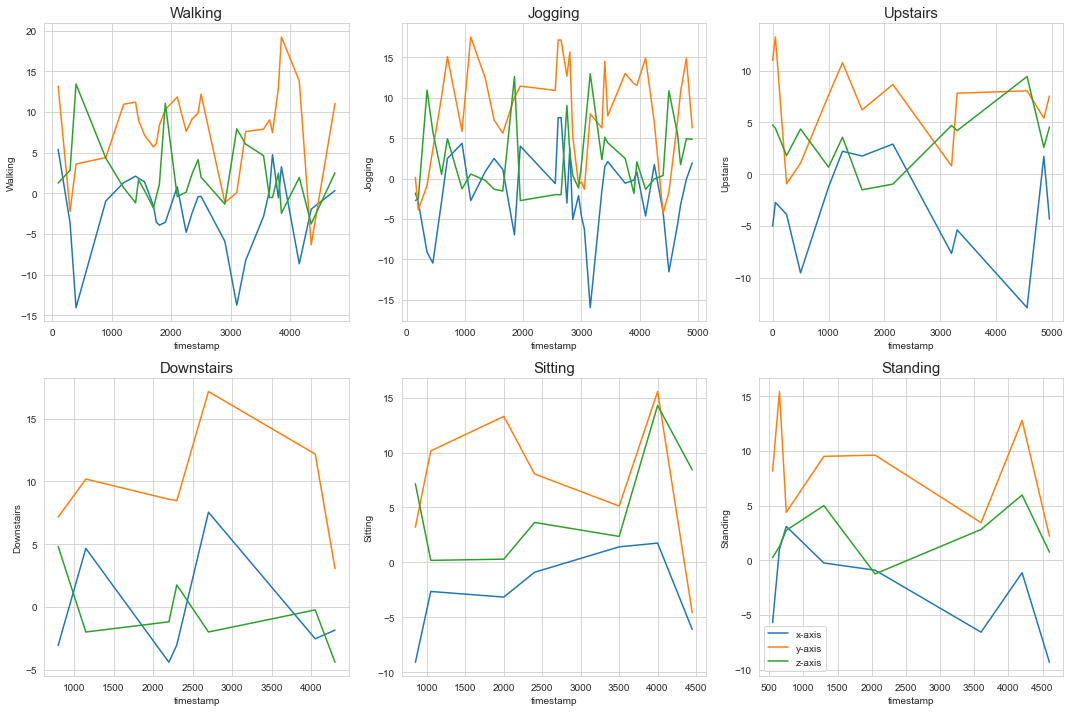

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through each activity
for idx, act in enumerate(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']):
    # Select data for the activity and user 1008_0
    dat = merged[(merged['user_snippet'] == '1008_0') & (merged['activity'] == act)][:400]
    
    # Add a subplot for the activity
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]
    
    # Plot the x, y, and z-axis signals for the activity
    sns.lineplot(y='x-axis', x='timestamp', data=dat, ax=ax)
    sns.lineplot(y='y-axis', x='timestamp', data=dat, ax=ax)
    sns.lineplot(y='z-axis', x='timestamp', data=dat, ax=ax)
    
    # Set the title and y-label for the subplot
    ax.set_title(act, fontsize=15)
    ax.set_ylabel(act)
    
# Adjust the spacing between subplots
plt.tight_layout()
plt.legend(['x-axis', 'y-axis', 'z-axis'])

# Save the figure
plt.savefig('all_signals.png')

# Show the figure
plt.show()


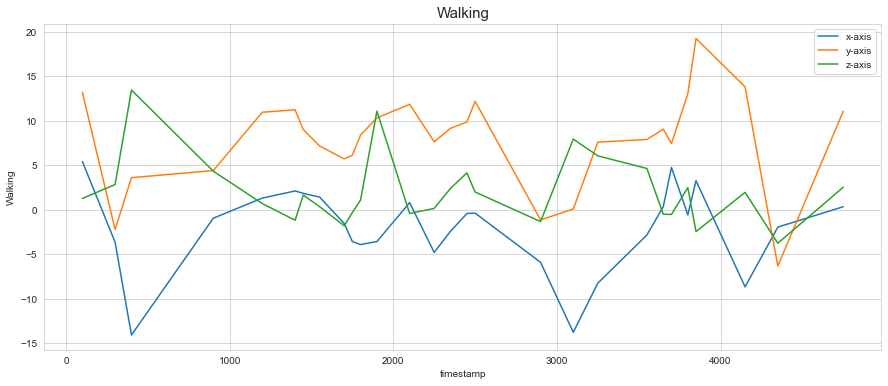

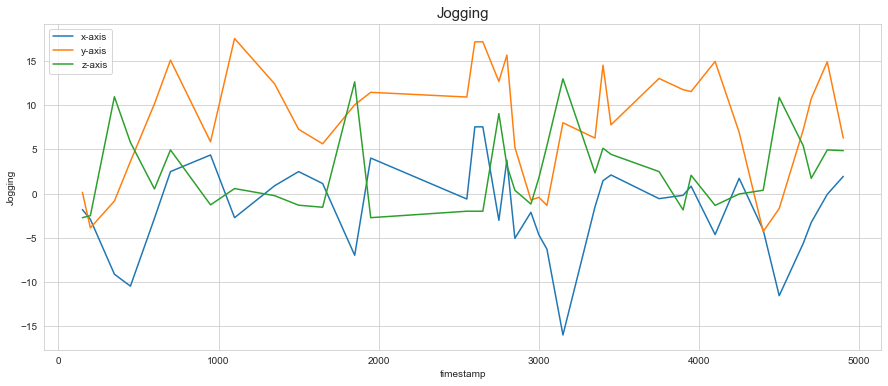

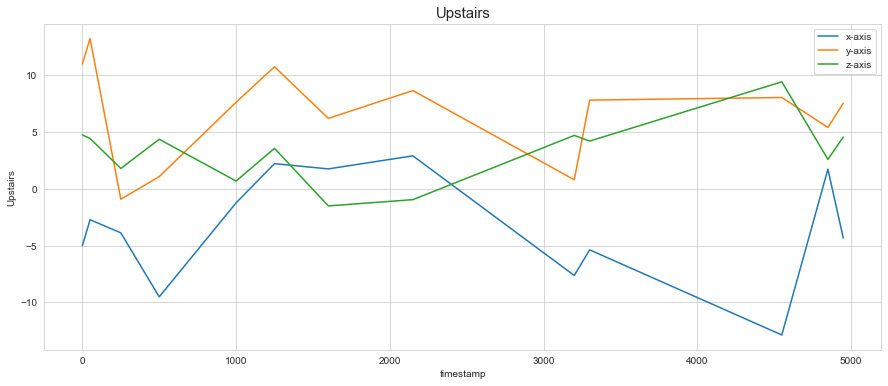

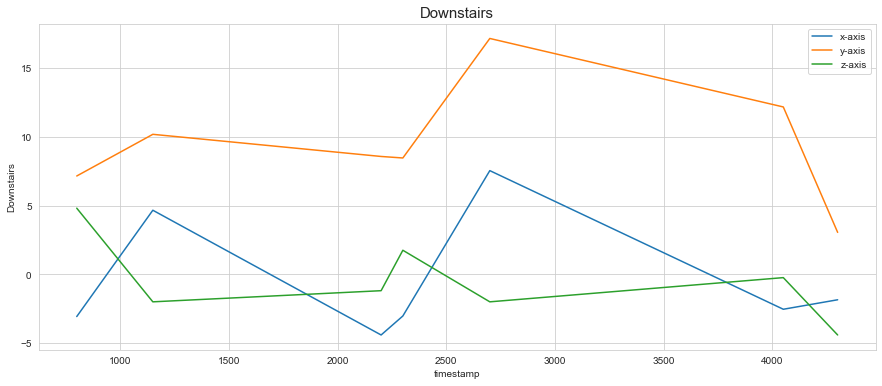

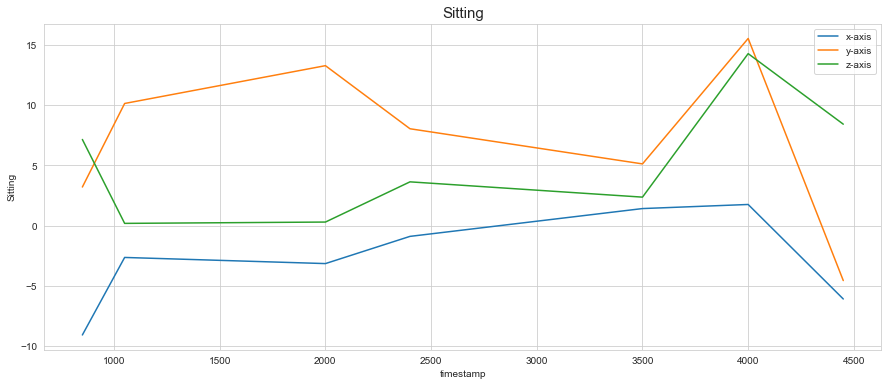

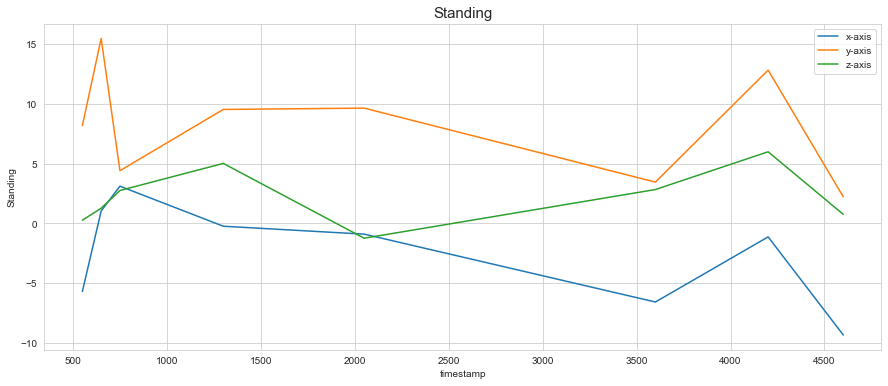

In [11]:
for i in ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']:
  dat = merged[(merged['user_snippet'] == '1008_0') & (merged['activity'] == i)][:400]
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'x-axis', x = 'timestamp', data = dat)
  sns.lineplot(y = 'y-axis', x = 'timestamp', data = dat)
  sns.lineplot(y = 'z-axis', x = 'timestamp', data = dat)
  plt.legend(['x-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.savefig('sigForUser.png')

  plt.show()




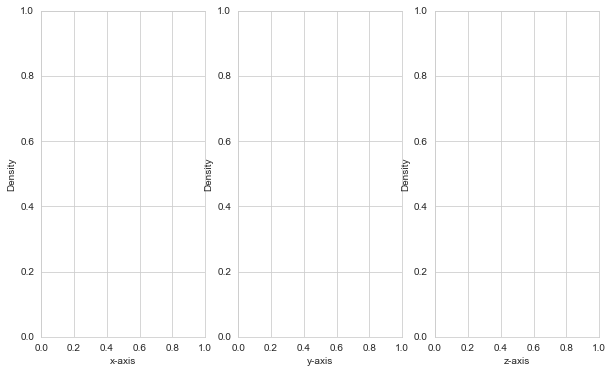

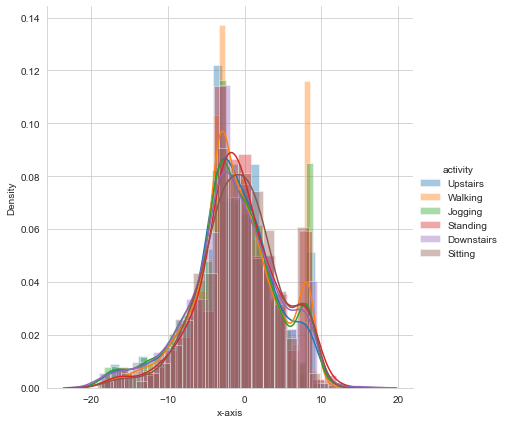

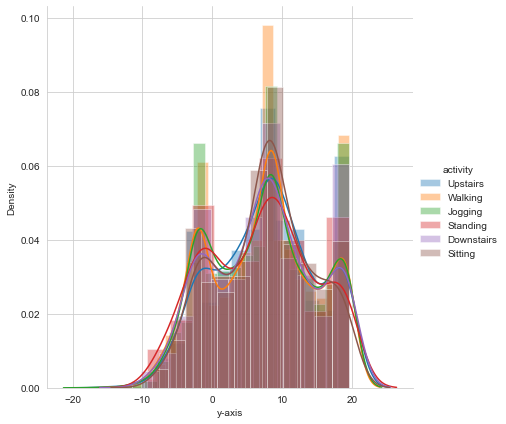

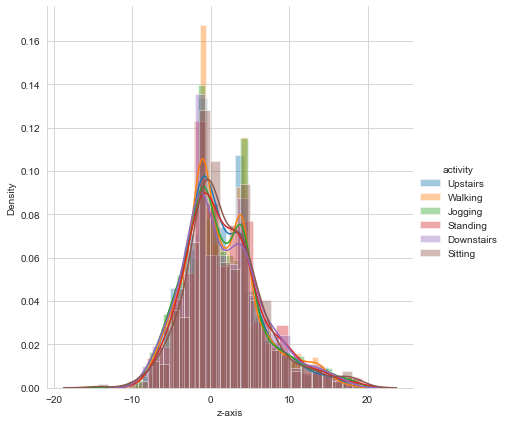

In [21]:
import matplotlib.pyplot as plt

# create a new figure
fig = plt.figure(figsize=(10, 6))

# plot subplots using FacetGrid and distplot
ax1 = fig.add_subplot(1, 3, 1)
sns.FacetGrid(merged, hue='activity', size=6).map(sns.distplot, 'x-axis').add_legend()
ax1.set_xlabel('x-axis')
ax1.set_ylabel('Density')
plt.savefig('activity-wise-distributionX.png', dpi=300, bbox_inches='tight')


ax2 = fig.add_subplot(1, 3, 2)
sns.FacetGrid(merged, hue='activity', size=6).map(sns.distplot, 'y-axis').add_legend()
ax2.set_xlabel('y-axis')
ax2.set_ylabel('Density')
plt.savefig('activity-wise-distributionY.png', dpi=300, bbox_inches='tight')


ax3 = fig.add_subplot(1, 3, 3)
sns.FacetGrid(merged, hue='activity', size=6).map(sns.distplot, 'z-axis').add_legend()
ax3.set_xlabel('z-axis')
ax3.set_ylabel('Density')

# save the figure as a png file
plt.savefig('activity-wise-distributionZ.png', dpi=300, bbox_inches='tight')


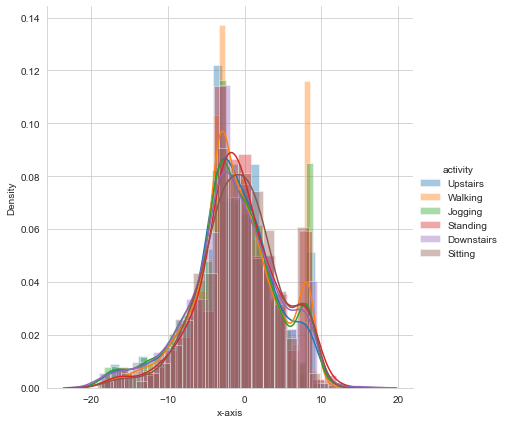

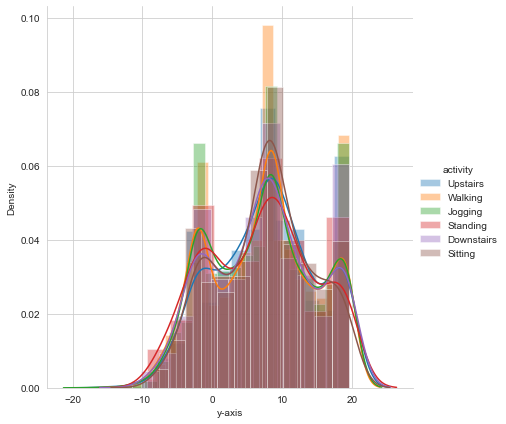

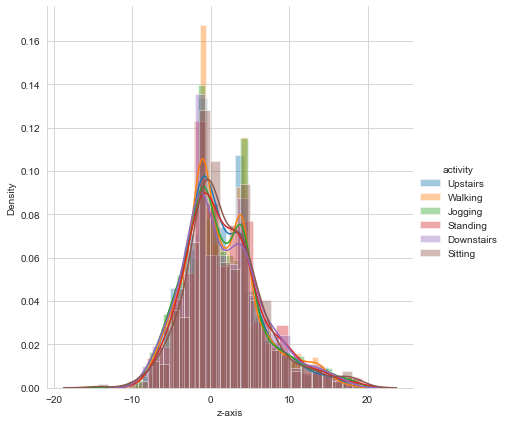

In [8]:
sns.FacetGrid(merged, hue = 'activity', size = 6).map(sns.distplot, 'x-axis').add_legend()
sns.FacetGrid(merged, hue = 'activity', size = 6).map(sns.distplot, 'y-axis').add_legend()
sns.FacetGrid(merged, hue = 'activity', size = 6).map(sns.distplot, 'z-axis').add_legend()

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=meta, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [22]:
meta.head(4)


,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,1008_0,-208.00,-1.820,-2.0800,100.0,4.702672,22.115124,5.142132,7.55,15.98,...,1.800,2.4245,100.0,3.994139,15.953143,4.672402,14.29,14.29,-4.40,Upstairs
1,1008_1,29.04,0.515,0.2904,100.0,2.650530,7.025310,2.666391,5.94,8.77,...,2.315,2.5945,100.0,3.144090,9.885305,4.076363,14.63,14.63,-5.79,Upstairs
2,1008_2,-160.29,-0.960,-1.6029,100.0,5.706680,32.566195,5.927519,9.77,17.58,...,-0.150,0.2158,100.0,4.570115,20.885948,4.575207,9.53,9.53,-7.31,Walking
3,1008_3,-138.32,-1.880,-1.3832,100.0,4.058896,16.474640,4.288109,6.55,12.68,...,1.470,2.6332,100.0,5.770800,33.302128,6.343175,14.63,14.63,-6.66,Jogging


In [18]:
tr_features = pd.read_csv('transformed_features.csv')
tr_features['user_snippet'] = meta['user_snippet']
tr_features['activity'] = merged['activity'] 


In [12]:

from sklearn.manifold import TSNE

def perform_tsne(x_train, y_train, perplexities, n_iter= 1000):
  for index, per in enumerate(perplexities):
    print('Performing TSNE with perplexity {} and iterations {}'.format(per, n_iter))
    x_reduced= TSNE(verbose= 1, perplexity= per).fit_transform(x_train)
    print('done...')

    df= pd.DataFrame({'x':x_reduced[:,0], 'y':x_reduced[:,1], 'label':y_train})
    print('creating plot for TSNE visualization..')
    plt.figure(figsize= (7, 7))
    sns.lmplot(data= df, x= 'x', y= 'y', hue= 'label', fit_reg=False, size= 8, palette= 'Set1', markers=['^','v','s','o', '1','2'])
    plt.title("perplexity : {} and max_iter : {}".format(per, n_iter))
    img_name = 'tsne' + '_perp_{}_iter_{}.png'.format(per, n_iter)

    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)

In [16]:
x_meta = meta.drop(['user_snippet', 'activity'], axis = 1)
pca2 = PCA(n_components=3, random_state=0).fit_transform(x_meta)


In [19]:


y_tsne = tr_features['activity']
X_tsne = tr_features.drop(['activity'], axis=1)
#perform_tsne(X_tsne, y_tsne, perplexities =[2,5,10,20,50])

In [20]:

from sklearn.decomposition import PCA

x_for_pca = tr_features.drop(['user_snippet', 'activity'], axis = 1)

pca = PCA(n_components=3, random_state=0).fit_transform(x_for_pca)
pca



array([[ -670.36279147,  -334.15478617,   -33.3115792 ],
       [-2395.56325671,  -791.95836963,  -195.56348379],
       [ -263.1132033 ,   846.08323142,   546.86843526],
       ...,
       [ 7071.1444438 ,  3342.36752399,  1856.3220439 ],
       [-1162.71573898,  1090.99362455,  -128.35401346],
       [ 6812.60132751,  4467.28076929,  1656.46261658]])

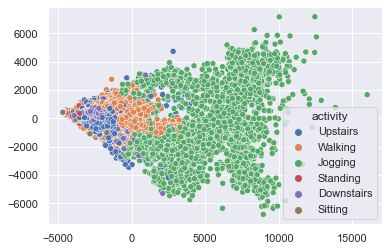

In [38]:
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = tr_features['activity'])
plt.savefig('pca.png')

plt.show()

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0, n_iter=1000).fit_transform(x_for_pca)

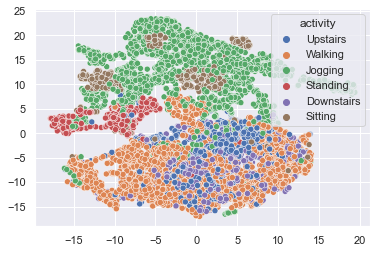

In [ ]:
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = tr_features['activity'])
plt.show()

In [70]:
def plot_3d(component1, component2, component3):

    """
    plot 2 different Principal Components in 2D space.
    :param component1: Principal Component 1
    :param component2: Principal Component 2
    """

    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,  # set color to an array/list of desired values
            colorscale='Rainbow',  # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])


    # tight layout
    fig.update_layout(margin=dict(l=50, r=50, b=50, t=50), width=1800, height=1000)
    fig.layout.template = 'plotly_dark'

    fig.show()

In [79]:

def plot_2d(component1, component2):

    """
    plot 2 different Principal Components in 2D space.
    :param component1: Principal Component 1
    :param component2: Principal Component 2
    """
    
    fig = go.Figure(data=go.Scatter(
        x=component1,
        y=component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y,  # set color equal to a variable
            colorscale='Rainbow',  # one of plotly colorscales
            showscale=True,
            line_width=1,
            colorbar=dict(
                tickmode='array',
                tickvals=[0,1,2,3,4,5],
                ticktext=['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
            )


        )
    ))
    fig.update_layout(margin=dict(l=100, r=100, b=100, t=100), width=2000, height=1200)
    fig.layout.template = 'plotly_dark'

    fig.show()

In [82]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x_for_pca)
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])


In [83]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x_meta)
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [136]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])


In [80]:
#plot_2d(tsne[:, 0],tsne[:, 1])
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
pio.renderers.default='browser'
LE = LabelEncoder()
enc = LE.fit_transform(merged['activity'])
x = merged.drop(['user_snippet', 'activity'],axis=1)

y = enc
plot_2d(pca[:, 0],pca[:, 1])


In [48]:
plot_3d(pca[:, 0],pca[:, 1],pca[:, 2])


In [81]:
plot_2d(tsne[:, 0],tsne[:, 1])


In [133]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

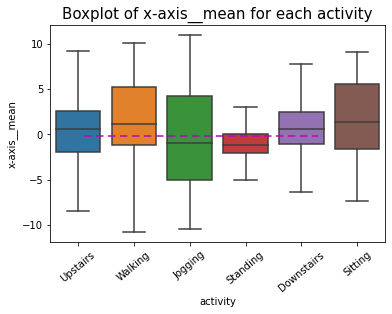

In [7]:
sns.boxplot(x='activity', y='x-axis__mean', data = meta, showfliers=False)
plt.title('Boxplot of x-axis__mean for each activity', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.savefig('activity-xmean.png', dpi=300, bbox_inches='tight')

plt.show()

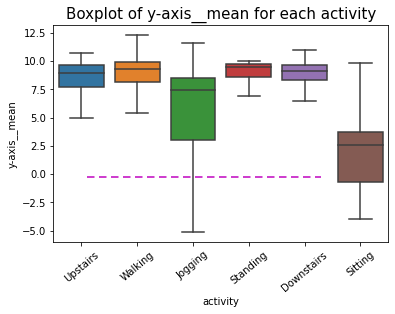

In [8]:
sns.boxplot(x='activity', y='y-axis__mean', data = meta, showfliers=False)
plt.title('Boxplot of y-axis__mean for each activity', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.savefig('activity-ymean.png', dpi=300, bbox_inches='tight')

plt.show()

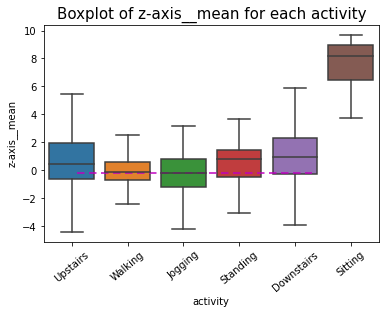

In [9]:
sns.boxplot(x='activity', y='z-axis__mean', data = meta, showfliers=False)
plt.title('Boxplot of z-axis__mean for each activity', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.savefig('activity-zmean.png', dpi=300, bbox_inches='tight')

plt.show()

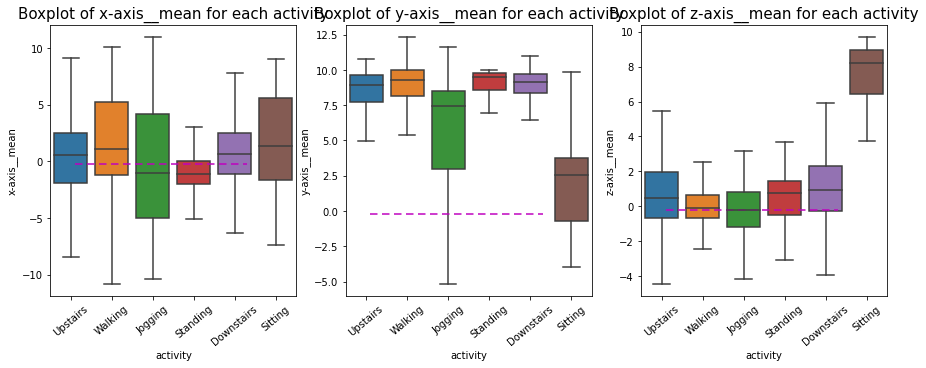

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the x-axis mean boxplot
sns.boxplot(x='activity', y='x-axis__mean', data=meta, showfliers=False, ax=axs[0])
axs[0].set_title('Boxplot of x-axis__mean for each activity', fontsize=15)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=40)
axs[0].axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')

# Plot the y-axis mean boxplot
sns.boxplot(x='activity', y='y-axis__mean', data=meta, showfliers=False, ax=axs[1])
axs[1].set_title('Boxplot of y-axis__mean for each activity', fontsize=15)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=40)
axs[1].axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')

# Plot the z-axis mean boxplot
sns.boxplot(x='activity', y='z-axis__mean', data=meta, showfliers=False, ax=axs[2])
axs[2].set_title('Boxplot of z-axis__mean for each activity', fontsize=15)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=40)
axs[2].axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')

# Save the figure
plt.savefig('activity-means.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()
